# Clipping
In this lesson we will learn how to to clip different geometries.

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data',
                                    'tiger_2022_us_state',
                                    'tl_2022_us_state.shp')
                                    )

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

### Check-in 1
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
data = [states, places, roads]

for i in data:
    i.columns = i.columns.str.lower()
    print(i.columns)

Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object')
Index(['scalerank', 'natscale', 'labelrank', 'featurecla', 'name', 'namepar',
       'namealt', 'nameascii', 'adm0cap', 'capalt', 'capin', 'worldcity',
       'megacity', 'sov0name', 'sov_a3', 'adm0name', 'adm0_a3', 'adm1name',
       'iso_a2', 'note', 'latitude', 'longitude', 'pop_max', 'pop_min',
       'pop_other', 'rank_max', 'rank_min', 'meganame', 'ls_name', 'min_zoom',
       'ne_id', 'geometry'],
      dtype='object')
Index(['scalerank', 'featurecla', 'type', 'sov_a3', 'note', 'edited', 'name',
       'namealt', 'namealtt', 'routeraw', 'question', 'length_km', 'toll',
       'ne_part', 'label', 'label2', 'local', 'localtype', 'localalt',
       'labelrank', 'ignore', 'add', 'rwdb_rd_id', 'orig_fid', 'prefix',
       'uident', 'continent', 'expressway', 'level', 'min_zoom', 'min_labe

### Prepare Alaska multipolygon
et’s start by taking taking a look at our states geo-dataframe. Since this is a geospatial dataset, exploration should include at least checking the head of the dataset, plotting the data, and looking at its CRS.

In [3]:
print(f"CRS: {states.crs}")

states.head(3)

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

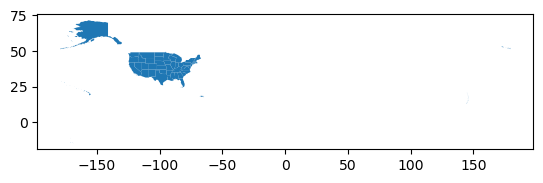

In [4]:
states.plot()

For this lesson, we are intersted in plotting data only Alaska, se let’s select this data

<Axes: >

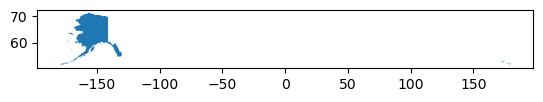

In [5]:
alaska = states[states.name =='Alaska']
alaska.plot()

Notice that the way the Alaska multipolygon is plotted under the NAD83/EPSG:4269 CRS separates the islands and unnaturally elongates the map. To fix this, we will reproject the Alaska geo-dataframe to the EPSG:3338 CRS. This CRS is a projected CRS, better suited for working with data from Alaska:

In [6]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

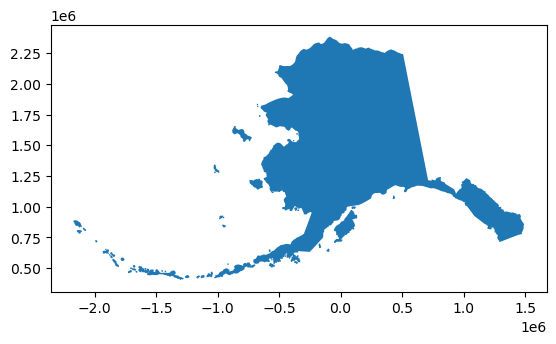

In [7]:
alaska.plot()

### Prepare populated places points
Let’s now explore the populated places data.

In [8]:
print(f"CRS: {places.crs}")

places.head(3)

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


<Axes: >

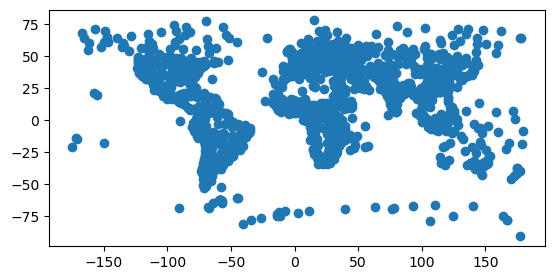

In [9]:
places.plot()

This dataset has the EPSG:4326 CRS. Remember this is the EPSG code for the WGS 84 CRS. This is not a surprise since the places data is global and EPSG:4326/WGS84 is the most widely used CRS for such data.

Let’s see what happens when we try to plot this data on top of Alaska:

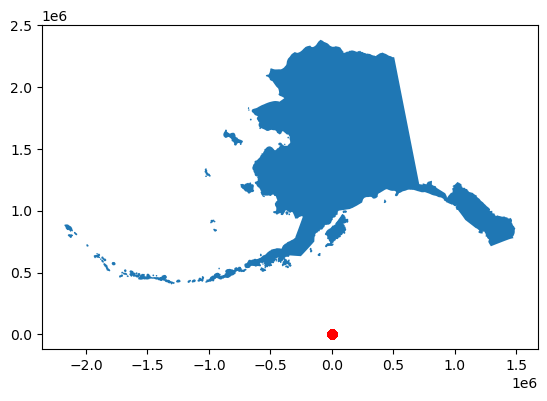

In [10]:
# Trouble
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

This is a classic slip in geospatial analysis. To plot, analyze, or integrate different geospatial datasets they must have the same CRS.

Here, alaska and places have different CRSs, leading to unexpected results when plotting them together:

In [11]:
alaska.crs == places.crs

False

### Check-in 2
Reproject the places geo-datafarme into alaska’s CRS and verify the CRSs match using assert.

In [14]:
# Reproject to CRS optimized for Alaska
places = places.to_crs('epsg:3338')

# Inspect the new CRS
assert alaska.crs == places.crs

Let’s check that map again:

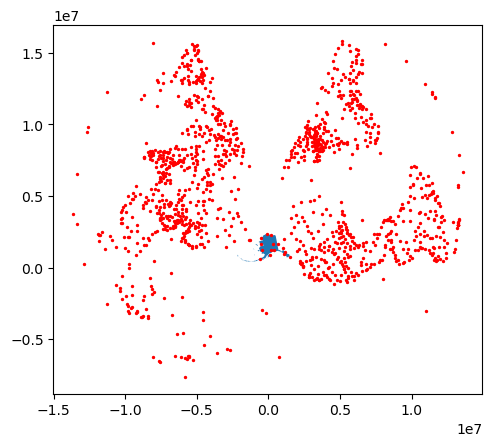

In [13]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2)

plt.show()

This is better: we can see there the Alaska poygons and some of the places points on top of it. Our next step is to select these points.

## Clipping
**Clipping** means using a polygon (or polygons) to only select geospatial data within them. Clipping a geopandas.GeoDataFrame is simple using the geopandas `clip()` function. The general syntax is:

`updated_geodf = geopandas.clip(geodf, mask)`

where:

- updated_geodf is the output of the method: the intersection of the geometries in geodf with mask,
- geodf is the geopandas.GeoDataFrame we want to clip,
- mask is a geopandas.GeoDataFrame with the polygon(s) we want to use for clipping. This mask must be in the same CRS as geodf!

In our case:

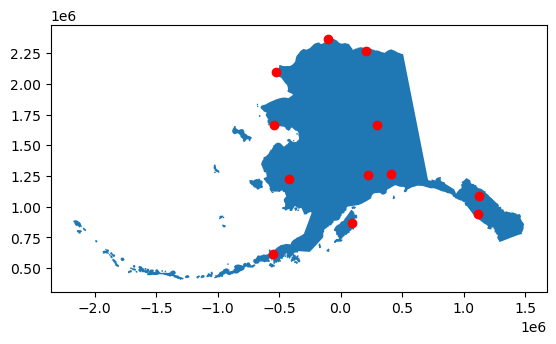

In [15]:
# Clip populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

## Prepare roads
Now we move on to our roads dataset.

In [16]:
print(roads.crs)

roads.head(3)

EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

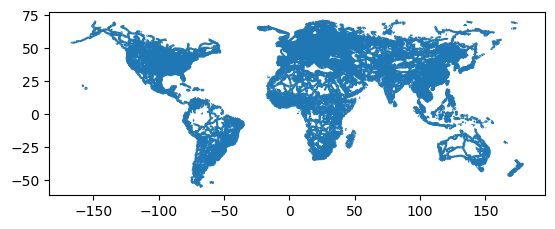

In [17]:
roads.plot()

You may have already noticed that the roads data is not in the same CRS as the alaska polygons, so these geo-datasets shound’t interact until they’re in the same CRS. Before jumping right into reprojecting and clipping, we will subset the data to select only US roads:

<Axes: >

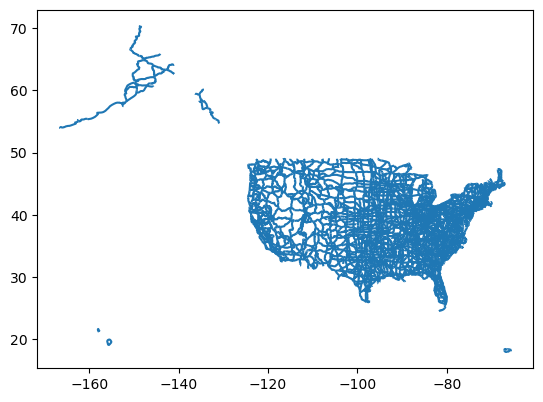

In [18]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

### Reduce your tabular data before reducing via geometries
Geospatial operations are usually costly in terms of computing power. The more detailed our geometries are, the longer in takes to do geospatial computations. It’s a good practice to reduce your data as much as possible before applying any geospatial transformation.

We will now compose functions to clip usa_roads using the alaska multipolygon. Notice we are using the ouput of usa_roads.to_crs(alaska.crs) directly and thus not changing the usa_roads geo-dataframe or creating new variables:

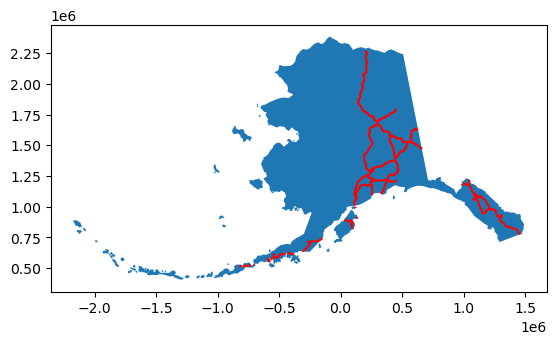

In [19]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color='red')
plt.show()

Notice how the lines break on the small islands? However, in the usa_roads there are no broken lines. This should make us suspect we are leaving data out and clipping *exactly* to the polygons in alaska is not quite what we want.

## Clipping with a bounding box
We will clip the usa_roads geo-dataframe with the **bounding box** of alaska instead of its polygons. To create a bounding box, we first use the `box()` function we imported from shapely.geometry. The syntax for box() is:

`box(minx, miny, maxx, maxy)`

the output is a polygon representing a box constructed like this:

![bounding box](https://meds-eds-220.github.io/MEDS-eds-220-course/book/images/lesson-13/bounding-box.png)

If we want to create a shapely polygon from the bounds of a geo-dataframe gdf, a more straightforward syntax is:

`box(*gdf.total_bounds)`

In our case:

In [20]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

<class 'shapely.geometry.polygon.Polygon'>


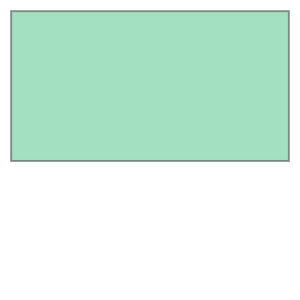

In [21]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

### * = unpacking operator
In the last syntax we used the asterisk * as an **unpacking operator** on the array alaska.total_bounds. Think about it as unpacking the elements of alaska.total_bounds and assigning them one-by-one to the paremeters minx, miny, maxx, maxy of the `box()` function.

This is a good article explaining more about unpacking with * in Python: https://geekflare.com/python-unpacking-operators/

Notice that the bounding box is not a geodataframe, it is a stand alone, abstract polygon without any geospatial information. To interpret this polygon as something on the Earth’s surface we need to wrap it into a geo-datfrane abd assign it a CRS:

In [23]:
# Create geo-dataframe from bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # Assign geometry column
                           crs = alaska.crs) # Assign CRS

print(type(ak_bbox)) 
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


We can now clip the roads using Alaska’s bounding box:

In [24]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs),  ak_bbox)

Notice the difference between the two clipping methods:

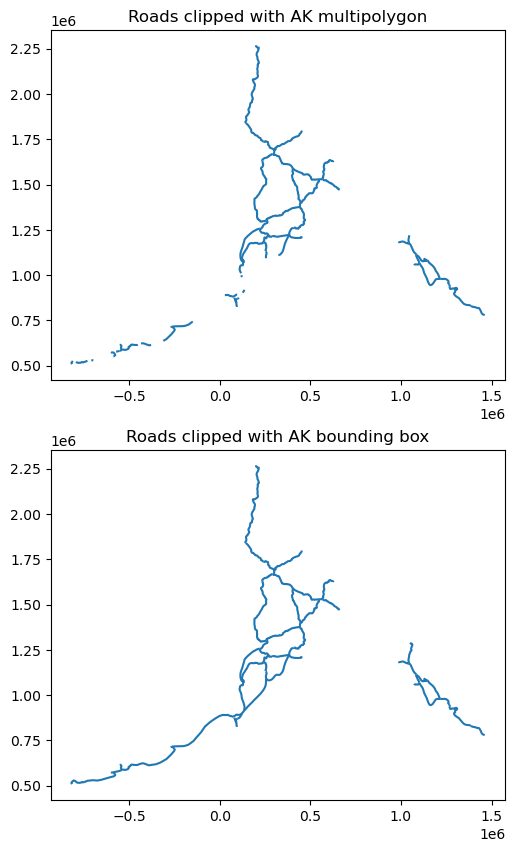

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

ak_roads.plot(ax = ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax = ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

## Plot
Finally, we can put all our data together in the same map:

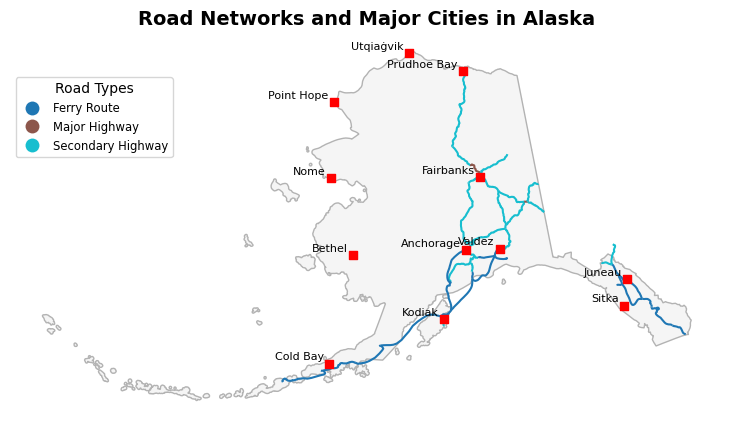

In [26]:
fig, ax = plt.subplots(figsize = (11,5))
ax.axis('off')

alaska.plot(ax = ax, color = 'whitesmoke', edgecolor = '0.7')

ak_complete_roads.plot(ax = ax,
                       zorder = 1,
                       column = 'type',
                       legend = True,
                       legend_kwds = {
                           'title':'Road Types',
                           'loc':'upper left',
                           'bbox_to_anchor':(0,0.9),
                           'fontsize': 'small'
                       })

ak_places.plot(ax = ax,
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

Update the map so these labels do not overlap. One way to do it is using an if when iterating over the Alaska populated places.

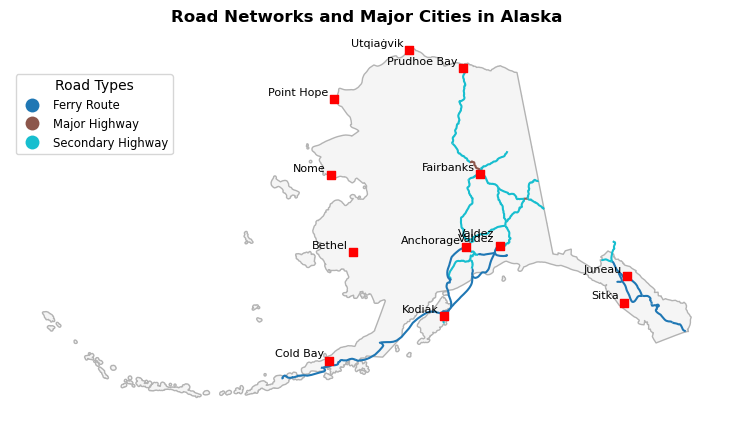

In [ ]:
fig, ax = plt.subplots(figsize = (11,5))
ax.axis('off')

alaska.plot(ax = ax, color = 'whitesmoke', edgecolor = '0.7')

ak_complete_roads.plot(ax = ax,
                       zorder = 1,
                       column = 'type',
                       legend = True,
                       legend_kwds = {
                           'title':'Road Types',
                           'loc':'upper left',
                           'bbox_to_anchor':(0,0.9),
                           'fontsize': 'small'
                       })

ak_places.plot(ax = ax,
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+20000, name, fontsize=8, ha='right')
    if name == 'Valdez':
        ax.text(x-30000, y+20000, name, fontsize = 8,ha = 'right')

ax.set_title("Road Networks and Major Cities in Alaska", fontweight='bold')

plt.show()